# Homework 3
### Optimization with Stochastic Gradient Descent

In [376]:
import numpy as np
import matplotlib.pylab as plt

from math import ceil

In [377]:
def SGD(l, grad_l, w0, data, batch_size, n_epochs, alpha=0.01):
    """
        Arguments:
            l: the function l(w; D) we want to optimize. It is supposed to be a Python function, not an array.
            grad_l: the gradient of l(w; D). It is supposed to be a Python function, not an array.
            w0: an n-dimensional array which represents the initial iterate. By default, it should be randomly sampled.
            data: a tuple (x, y) that contains the two arrays x and y, where x is the input data, y is the output data.
            batch_size: an integer. The dimension of each batch. Should be a divisor of the number of data.
            n_epochs: an integer. The number of epochs you want to repeat the iterations.
        Returns:
            w: an array that contains the value of w_k FOR EACH iterate w_k (not only the latter).
            f_val: an array that contains the value of l(w_k; data) FOR EACH iterate w_k ONLY after each epoch.
            grads: an array that contains the value of grad_l(w_k; data) FOR EACH iterate w_k ONLY after each epoch.
            err: an array the contains the value of ||grad_l(w_k; data)||_2 FOR EACH iterate w_k ONLY after each epoch.
    """
    X, Y = data
    d, N = X.shape

    # number of epochs * iterations per epoch
    tot_iterations = ceil(n_epochs * ceil(N / batch_size))

    w = np.zeros(tot_iterations + 1, dtype=object)
    f_val = np.zeros(n_epochs, dtype=object)
    grads = np.zeros(n_epochs, dtype=object)
    err = np.zeros(n_epochs, dtype=object)

    w[0] = w0
    k = 0

    for epoch in range(n_epochs):

        # Shuffle the dataset
        rng = np.random.default_rng()
        D = np.concatenate((Y, X.T), axis=1)
        rng.shuffle(D)
        X = D[:, 1:].T
        Y = D[:, 0].reshape(-1, 1)
        
        batches_num = ceil(N / batch_size)
        for batch in range(batches_num):
            # print(f"\tBatch {batch}")
            Mx = X[:, batch*batch_size:(batch+1)*batch_size]
            My = Y[batch*batch_size:(batch+1)*batch_size]
            M = (Mx, My)
            # Gradient descent step
            k = (epoch * batches_num) + batch
            w[k+1] = w[k] - alpha * grad_l(w[k], M) 

        f_val[epoch] = l(w[k+1], data)
        grads[epoch] = grad_l(w[k+1], data)
        
        err[epoch] = np.linalg.norm(grads[epoch])
        print(f"Epoch {epoch} \t-->", err[epoch])
    
    return w, f_val, grads, err

In [378]:
# Load MINST dataset
import pandas as pd
df = pd.read_csv("../data/data.csv")
data_raw = np.array(df)
X_raw = data_raw[:, 1:]
y_raw = data_raw[:, 0]
X_raw.shape, y_raw.shape

((42000, 784), (42000,))

In [379]:
digit_list = [6, 2]
d1 = digit_list[0]
d2 = digit_list[1]

mask = [y_i in digit_list for y_i in y_raw]
map_f = lambda x: 0 if x == d1 else 1
y = np.array([map_f(x) for x in y_raw[mask]])

X = X_raw[mask, :]
X.shape, y.shape

((8314, 784), (8314,))

In [380]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)
X_train = X_train.T
X_test = X_test.T
y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((784, 4157), (784, 4157), (4157, 1), (4157, 1))

In [381]:
def sigmoid(x):
    return 1./(1.+np.exp(-x))

def der_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [382]:
def l(w, D):
    X, y = D
    d, N = X.shape
    return np.sum(np.power(np.linalg.norm(sigmoid(X.T @ w) - y, axis=1), 2))/N

def grad_l(w, D):
    X, y = D
    d, N = X.shape
    
    return X@(sigmoid(X.T@w)*(1-sigmoid(X.T@w))*(sigmoid(X.T@w) - y))/N

In [383]:
# init weights
rng = np.random.default_rng()
# w0 = rng.normal(0, 1, size=(X_train.shape[0] + 1, 1))
w0 = np.ones((X_train.shape[0] + 1, 1)) * 10e-5
X_hat = np.concatenate((np.ones((1, X_train.shape[1])), X_train), axis=0)

In [384]:
n_epochs = 100
batch_size = 100
w, f_val, grads, err = SGD(l, grad_l, w0, (X_hat, y_train), batch_size, n_epochs, alpha=0.00001)

Epoch 0 	--> 4.470162955901304
Epoch 1 	--> 4.077032613852765
Epoch 2 	--> 1.8981210792113319
Epoch 3 	--> 2.046794224394193
Epoch 4 	--> 1.4532566744540778
Epoch 5 	--> 2.8878273030033723
Epoch 6 	--> 2.807373518470012
Epoch 7 	--> 1.005166834677032
Epoch 8 	--> 0.95302865586006
Epoch 9 	--> 1.8223826147444326
Epoch 10 	--> 1.073991635593686
Epoch 11 	--> 0.9578957364915742
Epoch 12 	--> 0.7070472226196783
Epoch 13 	--> 1.163830455564552
Epoch 14 	--> 0.9167374728637655
Epoch 15 	--> 0.5984637494423394
Epoch 16 	--> 0.5909317050327516
Epoch 17 	--> 1.9906885671603387
Epoch 18 	--> 0.644668432537105
Epoch 19 	--> 0.5166311966370094
Epoch 20 	--> 0.7450214403369347
Epoch 21 	--> 1.086632565561707
Epoch 22 	--> 0.6781308993005989
Epoch 23 	--> 0.9806152672657575
Epoch 24 	--> 0.5887609009589717
Epoch 25 	--> 0.4871712509791245
Epoch 26 	--> 1.0990694808238803
Epoch 27 	--> 0.45297437650050226
Epoch 28 	--> 0.5430793695685555
Epoch 29 	--> 0.9784632442321871
Epoch 30 	--> 0.43091461622919

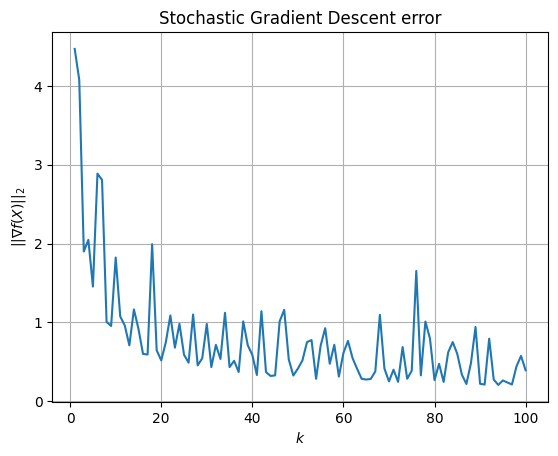

In [397]:
plt.title("Stochastic Gradient Descent error")
plt.xlabel("$k$")
plt.ylabel("$||\\nabla f(X)||_2$")
plt.grid()
plt.plot([x for x in range(1, n_epochs + 1)], err)

In [386]:
X_test_hat = np.concatenate((np.ones((1, X_test.shape[1])), X_test), axis=0)
predictions = sigmoid(X_test_hat.T @ w[-1])
y_predicted = np.apply_along_axis(lambda x: 0 if x < 0.5 else 1, 1, predictions).reshape((-1,1))

In [387]:
def compute_accuracy(y_true, y_guess):
    return (len(y_true) - np.count_nonzero(y_true - y_guess)) / len(y_true) * 100

In [388]:
print("SGD accuracy:\t", compute_accuracy(y_predicted, y_test))

SGD accuracy:	 98.05147943228289


In [389]:
print("SGD predicted class")
print(f"class {d1}: {y_predicted[y_predicted == 0].shape[0]}\nclass {d2}: {y_predicted[y_predicted == 1].shape[0]}")

SGD predicted class
class 6: 2089
class 2: 2068


In [390]:
def GD_log_reg(f, grad_f, w0, D, tolf, tolx, kmax, alpha=0.1):
    # As output, we want:
    # x -> The stationary point
    # f_val -> A vector containing the values of f during the iterations
    # err_val -> A vector containing the values of ||grad_f(x_k)||

    f_val = [f(w0, D)]
    err_val = [np.linalg.norm(grad_f(w0, D))]
    
    # Init iteration
    k = 0
    x = [w0]
    
    rel_tol_cond = True
    rel_inp_cond = True
    max_it_cond = True
    
    while rel_tol_cond and rel_inp_cond and max_it_cond:
        x.append(x[k] - alpha * grad_f(x[k], D))
        f_val.append(f(x[k+1], D))
        err_val.append(np.linalg.norm(grad_f(x[k], D)))
        
        k += 1
        if(k % 100 == 0): 
            print(f"iteration: {k}\t-->", err_val[-1])

        rel_tol_cond = np.linalg.norm(grad_f(x[k-1], D)) > tolf * np.linalg.norm(grad_f(w0, D))
        # We skip the first iteration
        rel_inp_cond = True if k == 0 else np.linalg.norm(x[k] - x[k-1]) > tolx
        max_it_cond = k < kmax

    return x[k], f_val, err_val

In [391]:
max_it = 300
res_gd = GD_log_reg(l, grad_l, w0, (X_hat, y_train), 0., 0., max_it, alpha=1e-6)
w_k, f_val, err_val = res_gd

iteration: 100	--> 13.744131323977697
iteration: 200	--> 7.568777494199155
iteration: 300	--> 5.41723195408685


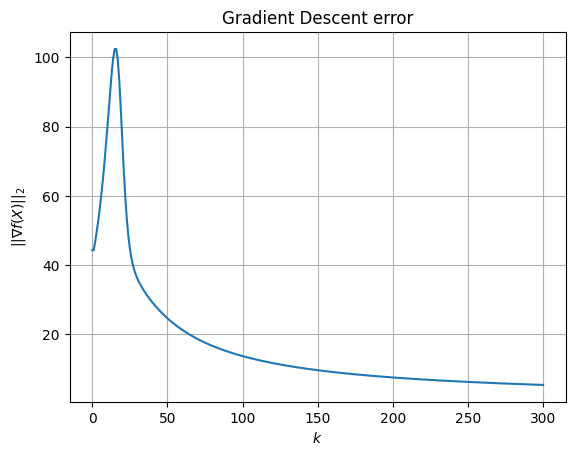

In [395]:
plt.title("Gradient Descent error")
plt.xlabel("$k$")
plt.ylabel("$||\\nabla f(X)||_2$")
plt.grid()
plt.plot([x for x in range(0, max_it + 1)], err_val)

In [393]:
X_test_hat = np.concatenate((np.ones((1, X_test.shape[1])), X_test), axis=0)
predictions = sigmoid(X_test_hat.T @ w_k)
y_predicted = np.apply_along_axis(lambda x: 0 if x < 0.5 else 1, 1, predictions).reshape((-1,1))
print("GD accuracy:\t", compute_accuracy(y_test, y_predicted))

GD accuracy:	 96.31946114986769


In [394]:
print("GD predicted class")
print(f"class {d1}: {y_predicted[y_predicted == 0].shape[0]}\nclass {d2}: {y_predicted[y_predicted == 1].shape[0]}")

GD predicted class
class 6: 2077
class 2: 2080
